In [1]:
import sys

sys.path.append("..")
from core.DataLoader import (
    DataPreprocessor,
    DataConfig,
    LoadConfig,
    get_load_config_from_yaml,
)
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
import yaml
import core.assignment_models as Models
from core.reconstruction import MLEvaluator, MLReconstructorBase
import core
import keras


PLOTS_DIR = "plots/plot_histories/"

import os

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)


load_config = get_load_config_from_yaml("workspace_config.yaml")
load_config_high_level = get_load_config_from_yaml(
    "workspace_config_high_level_features.yaml"
)
DataProcessor = DataPreprocessor(load_config)
DataProcessor_high_level = DataPreprocessor(load_config_high_level)

data_config_path = "workspace_config.yaml"
with open(data_config_path, "r") as file:
    data_configs = yaml.safe_load(file)

data_config = DataProcessor.load_data(
    data_configs["data_path"]["nominal"], "reco", max_events=400000
)
X_train, y_train, X_val, y_val = DataProcessor.split_data(test_size=0.1)
data_config_high_level = DataProcessor_high_level.load_data(
    data_configs["data_path"]["nominal"], "reco", max_events=400000
)
X_train_high_level, y_train_high_level, X_val_high_level, y_val_high_level = DataProcessor_high_level.split_data(
    test_size=0.1
)
MODEL_DIRS = ["models/assignment_rnn/", "models/assignment_transformer/", "models/assignment_transformer_high_level_features/"]
MODEL_CONFIGS = [data_config, data_config, data_config_high_level]
MODEL_NAMES = ["RNN", "Transformer", "Transformer High Level"]
MODEL_X_TEST = [X_val, X_val, X_val_high_level]
MODEL_Y_TEST = [y_val, y_val, y_val_high_level]

ml_reconstructors = []
ml_evaluators = []
for i in range(len(MODEL_DIRS)):
    reconstructor = MLReconstructorBase(MODEL_CONFIGS[i], name=MODEL_NAMES[i], perform_regression=False)
    reconstructor.load_model(MODEL_DIRS[i] + "model.keras")
    ml_reconstructors.append(reconstructor)

evaluator = MLEvaluator(
    reconstructor=ml_reconstructors,
    X_test=MODEL_X_TEST,
    y_test=MODEL_Y_TEST,
)



2025-11-12 22:32:10.127685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762983130.151588 2478343 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762983130.159722 2478343 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762983130.179240 2478343 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762983130.179265 2478343 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762983130.179267 2478343 computation_placer.cc:177] computation placer alr

Removed 1226 events with negative weights
Removed 1226 events with negative weights


I0000 00:00:1762983201.692335 2478343 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15511 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:65:00.0, compute capability: 6.0


Model loaded from models/assignment_rnn/model.keras
Training history loaded from models/assignment_rnn/model_history.npz
Model loaded from models/assignment_transformer/model.keras
Training history loaded from models/assignment_transformer/model_history.npz
Model loaded from models/assignment_transformer_high_level_features/model.keras
Training history loaded from models/assignment_transformer_high_level_features/model_history.npz


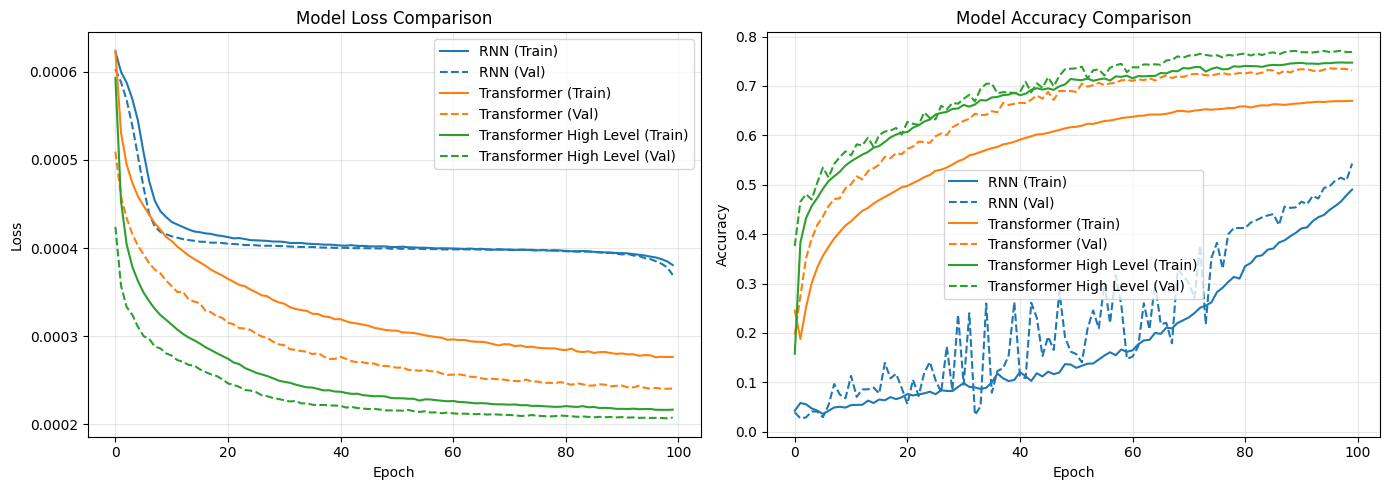

In [2]:
fig, ax = evaluator.plot_training_history()
fig.savefig(PLOTS_DIR + "training_histories_comparison.png")

Computing feature importance for RNN (features: jet, lepton, met)...


I0000 00:00:1762983208.131677 2479598 service.cc:152] XLA service 0x55df449ca540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762983208.131704 2479598 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2025-11-12 22:33:28.331420: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator FeatureConcatRNN_1/met_input_transform_1/assert_equal_1/Assert/Assert
2025-11-12 22:33:28.343053: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762983209.261110 2479598 cuda_dnn.cc:529] Loaded cuDNN version 91500
I0000 00:00:1762983210.348742 2479598 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-11-12 22:33:33.374983: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert opera

Baseline Assignment Performance: 0.6025
Saved feature importance plot to plots/plot_histories//RNN_feature_importance.png
Computing feature importance for Transformer (features: jet, lepton, met)...


2025-11-12 22:36:40.078076: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator FeatureConcatTransformerModel_1/met_input_transform_1/assert_equal_1/Assert/Assert
2025-11-12 22:36:42.968523: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator FeatureConcatTransformerModel_1/met_input_transform_1/assert_equal_1/Assert/Assert


Baseline Assignment Performance: 0.7649
Saved feature importance plot to plots/plot_histories//Transformer_feature_importance.png
Computing feature importance for Transformer High Level (features: jet, lepton, met)...


2025-11-12 22:39:26.725484: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator FeatureConcatTransformerModel_1/met_input_transform_1/assert_equal_1/Assert/Assert
2025-11-12 22:39:29.506238: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator FeatureConcatTransformerModel_1/met_input_transform_1/assert_equal_1/Assert/Assert


Baseline Assignment Performance: 0.7922
Saved feature importance plot to plots/plot_histories//Transformer High Level_feature_importance.png


[(<Figure size 1000x600 with 1 Axes>,
  <Axes: title={'center': 'Feature Importance - RNN'}, xlabel='Importance Score'>),
 (<Figure size 1000x600 with 1 Axes>,
  <Axes: title={'center': 'Feature Importance - Transformer'}, xlabel='Importance Score'>),
 (<Figure size 1000x600 with 1 Axes>,
  <Axes: title={'center': 'Feature Importance - Transformer High Level'}, xlabel='Importance Score'>)]

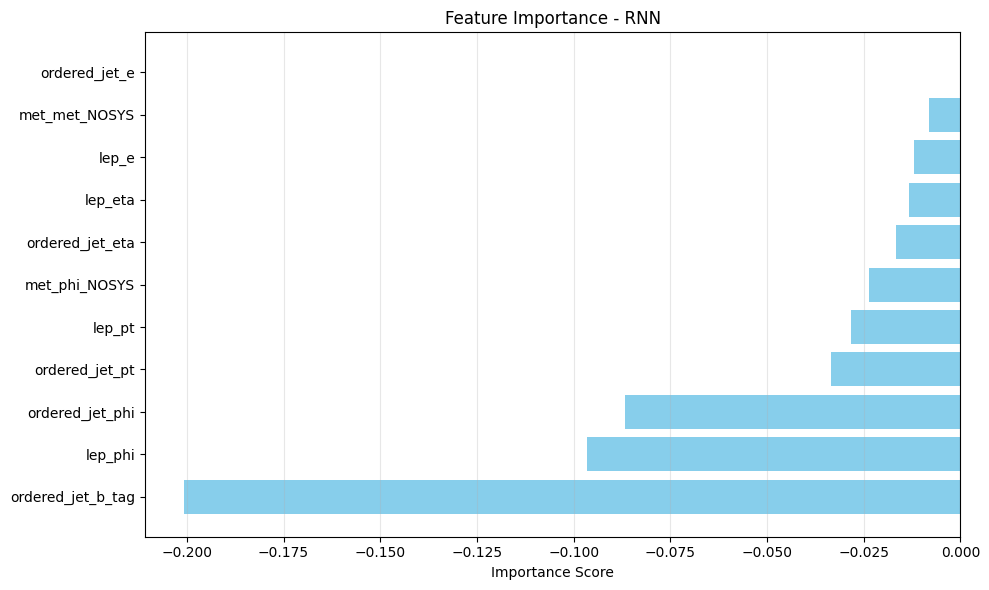

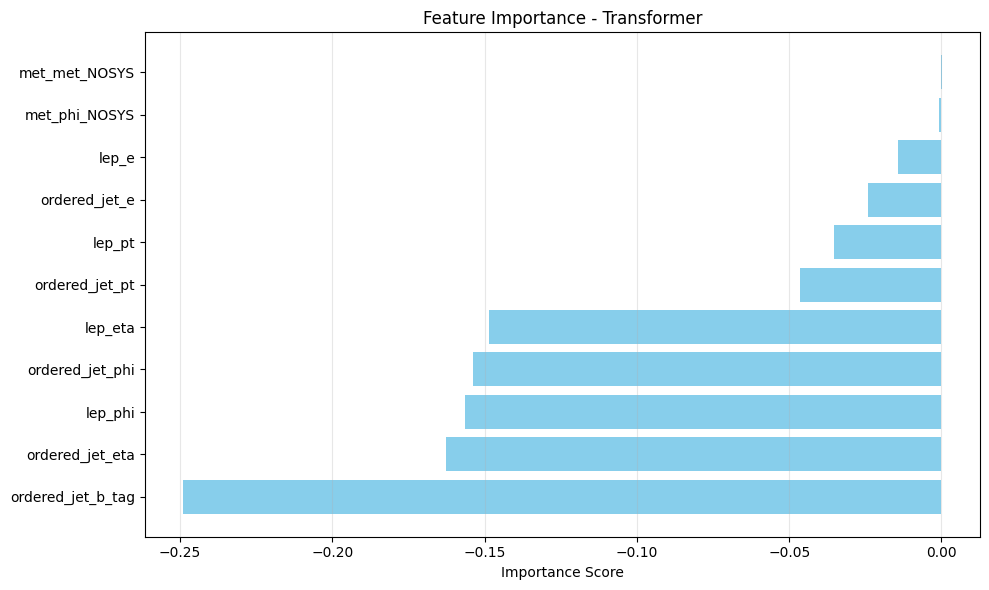

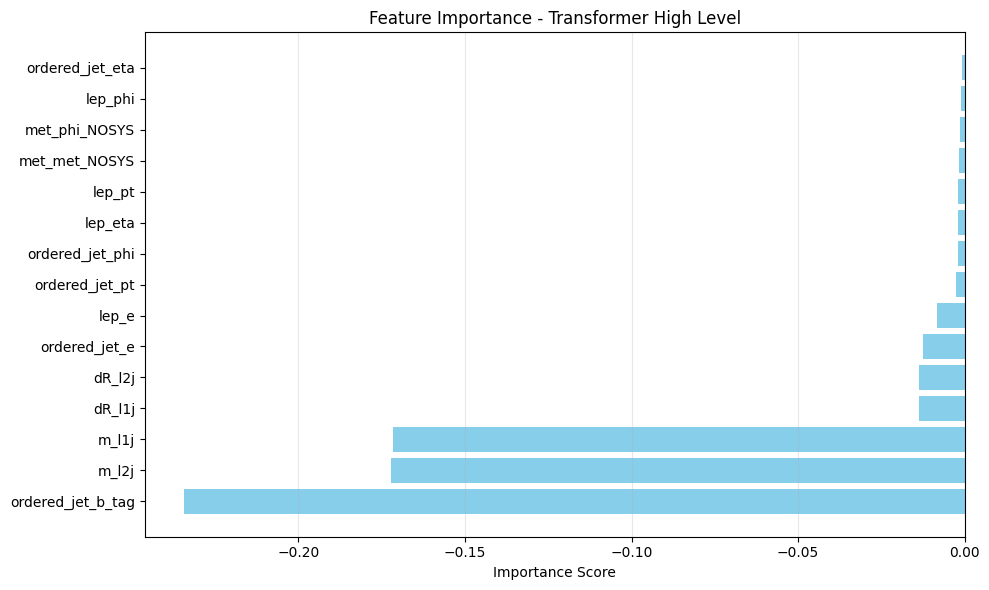

In [3]:
evaluator.plot_feature_importance(save_dir=PLOTS_DIR)